# 1: Cài Thư Viện

In [14]:
%pip install imageio
%pip install scipy
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2. VIÉT CHƯƠNG TRÌNH XỬ LÝ ẢNH CƠ BẢN

# 2.1. Nạp ảnh sử dụng thư viện Python Image Library (PIL)


In [16]:
from PIL import Image
import numpy as np
img = Image.open('bird.png')
img.show()

# 2.2. Nạp ảnh sử dụng lệnh thư viện imageio

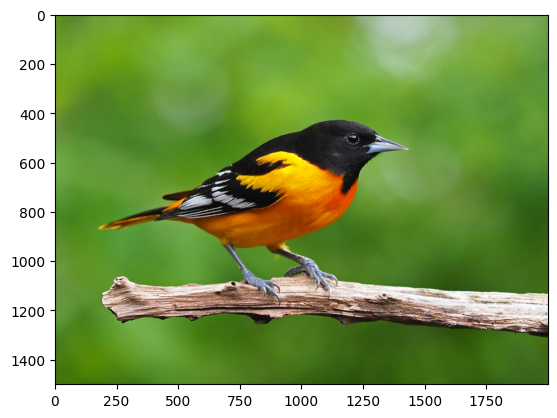

(1500, 2000, 3)

In [1]:
import numpy as np
import imageio.v2 as ilo
import matplotlib.pyplot as plt
data = ilo.imread('bird.png')
plt.imshow (data)
plt.show ()
data.shape

## 2.3 Độ phân giải ảnh
#Viết chương trình nạp ảnh màu và chuyển sang ảnh grayscale

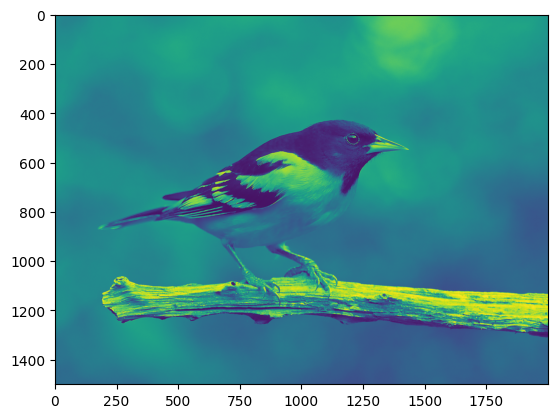

In [2]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png', mode='L')
plt.imshow (data)
plt.show ()

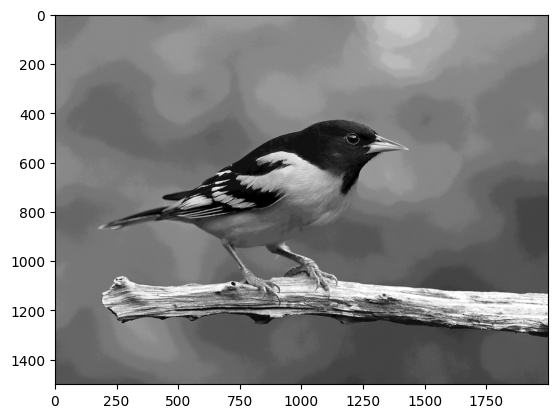

In [3]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png', mode='L').astype (np.uint8)
cl = data & 0xF0
iio.imsave('birdf0.png',cl)
tmp = iio.imread('birdf0.png')
plt.imshow (tmp, cmap='gray')
plt.show ()

# 2.4. Màu sắc với hệ RGB


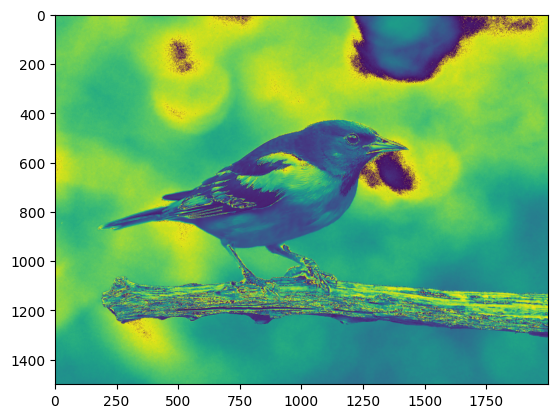

In [4]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png')
bdata = (data[:,:,1] + data[:,:,2])
plt.imshow (bdata)
plt.show ()

# 2.5. Màu sắc với hệ HSV

In [28]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys
a = colorsys.rgb_to_hsv (255, 0, 0)
print (a)
b = colorsys.rgb_to_hsv(1, 0, 0)
print(b)
c = colorsys.rgb_to_hsv (0, 255, 0)
print (c)
d = colorsys.hsv_to_rgb(1, 1, 255)
print (d)

(0.0, 1.0, 255)
(0.0, 1.0, 1)
(0.3333333333333333, 1.0, 255)
(255, 0.0, 0.0)


# 2.6. Úng dụng chuyển đổi hệ màu

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


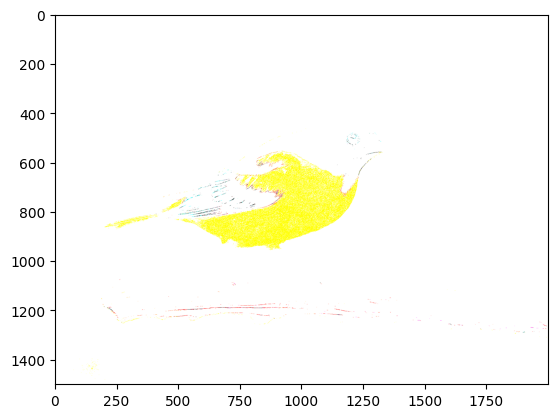

In [32]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys
rgb = iio.imread('bird.png')
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h, s, v= rgb2hsv (rgb[:,:,0], rgb[:,:,1], rgb[:,:,2])
h*= h
hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)
rgb2 = hsv2rgb (h, s, v)
rgb2 = np.array(rgb2).transpose((1, 2, 0))
plt.imshow(rgb2)
plt.show ()


# 3. Bài tập


#1: Viết chương trình nạp một ảnh và lưu thành 3 ảnh với 3 màu khác nhau

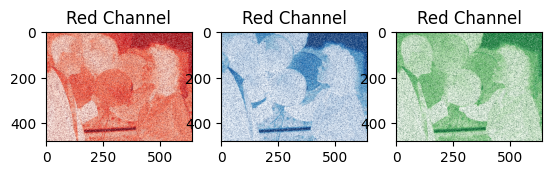

In [ ]:
data = iio.imread('exercise/balloons_noisy.png')
plt.subplot(1, 3, 1)
plt.title('Red Channel')
plt.imshow(data[:, :, 0], cmap='Reds')
plt.subplot(1, 3, 2)
plt.title('Blue Channel')
plt.imshow(data[:, :, 2], cmap='Blues')
plt.subplot(1, 3, 3)
plt.title('Green Channel')
plt.imshow(data[:, :, 1], cmap='Greens')
plt.show()

#2: Viết chương trình nạp một ảnh và hoán đổi giá trị các màu. Lưu các ảnh vào máy

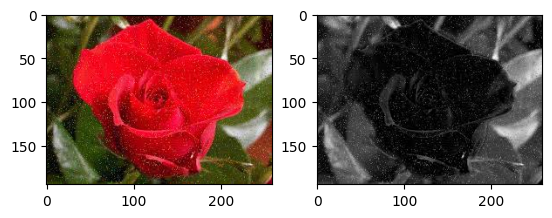

In [ ]:
data = iio.imread('exercise/flower.jpeg')
swapped = data[:,:, [1, 1 , 1]]
iio.imwrite('flower_den.png', swapped)
plt.subplot(1,2,1)
plt.imshow(data)
plt.subplot(1,2,2)
plt.imshow(swapped)
plt.show()

#3: Viết chương trình nạp một ảnh, chuyển thành hệ màu HSV và lưu 3 ảnh với 3 màu khác
nhau.


In [65]:
img = iio.imread('exercise/flower.jpeg')
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
r = img[:, :, 0] / 255.0
g = img[:, :, 1] / 255.0
b = img[:, :, 2] / 255.0
h, s, v = rgb2hsv(r, g, b)
h_img = (h * 255).astype(np.uint8)
s_img = (s * 255).astype(np.uint8)
v_img = (v * 255).astype(np.uint8)
iio.imwrite('flower_h.png', h_img)
iio.imwrite('flower_s.png', s_img)
iio.imwrite('flower_v.png', v_img)

#4: Viết chương trình nạp một ảnh, chuyển sang hệ màu HSV. Lưu ảnh mới với kênh Hnew= 1/3
Hold, Vnew = 3/4 Vold.


In [66]:
h = h / 3
v = v * 0.75
hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)
r_new, g_new, b_new = hsv2rgb(h, s, v)
rgb_new = np.dstack((r_new, g_new, b_new)) * 255
rgb_new = rgb_new.astype(np.uint8)
iio.imwrite('flower_hsv_modified.png', rgb_new)